<a href="https://colab.research.google.com/github/hadeeniyaf/Data-science/blob/main/DigitSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict any Handwritten digit**
This notebook demonstrates a Convolutional Neural Network (CNN) for classifying handwritten digits.


uploading the zip file which contains the images of all 10 digits

In [3]:
import os
import zipfile

zip_path = "/content/archive (18).zip"
extract_to = "/content/digits_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [4]:
dataset_path = "/content/digits_dataset"
print("Folders in dataset:", os.listdir(dataset_path))# Verification


Folders in dataset: ['3', '4', '5', '2', '9', '1', '0', '8', '7', '6']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (28, 28)  # Resize images to 28x28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',  # Because digits are multi-class (0-9)
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 17247 images belonging to 10 classes.
Found 4308 images belonging to 10 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,  # Reduce rotation (was 10)
    zoom_range=0.05,  # Reduce zoom (was 0.1)
    width_shift_range=0.05,  # Reduce shifting (was 0.1)
    height_shift_range=0.05
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Reduce dropout (was 0.5)
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the CNN model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20  # Change to more epochs if needed
)# may take upto 10 mins

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


539/539 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.3588 - loss: 1.7680 - val_accuracy: 0.7776 - val_loss: 0.6655
Epoch 2/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.8498 - loss: 0.4795 - val_accuracy: 0.8377 - val_loss: 0.4856
Epoch 3/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.8995 - loss: 0.3218 - val_accuracy: 0.8658 - val_loss: 0.4133
Epoch 4/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9305 - loss: 0.2227 - val_accuracy: 0.8909 - val_loss: 0.3446
Epoch 5/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9428 - loss: 0.1842 - val_accuracy: 0.9004 - val_loss: 0.3172
Epoch 6/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9583 - loss: 0.1415 - val_accuracy: 0.8962 - val_loss: 0.3366
Epoch 7/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9571 - loss: 0.1315 - val_accuracy: 0.9030 - val_loss: 0.3165
Epoch 8/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9655 - loss: 0.1153 - val_accurac

In [10]:
# Evaluate model performance
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9017 - loss: 0.5141
Validation Accuracy: 90.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


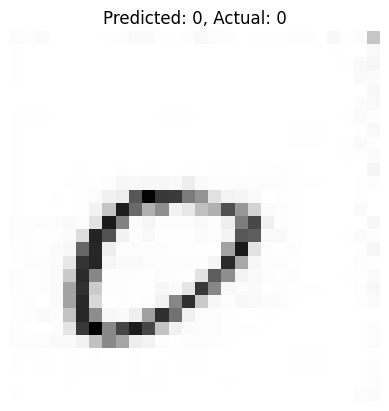

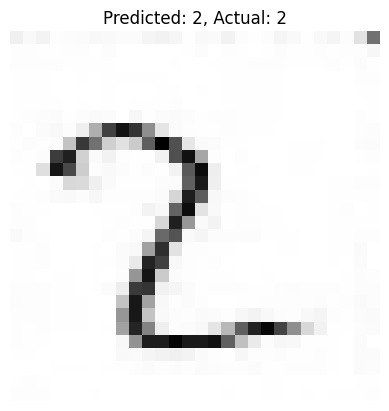

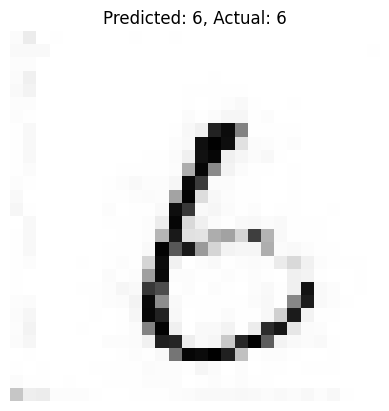

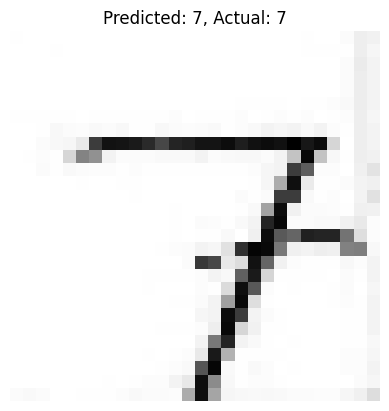

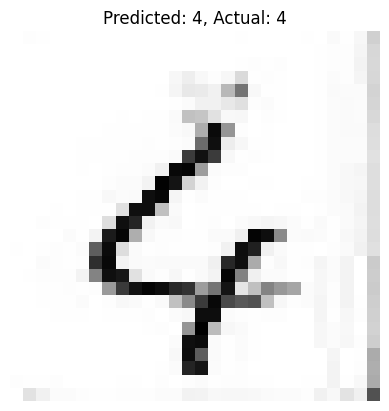

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation set
images, labels = next(iter(val_generator))

# Predict using the trained model
predictions = model.predict(images)

# Display first 5 images with predictions
for i in range(5):
    plt.imshow(images[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(labels[i])}")
    plt.axis('off')
    plt.show()

Saving 5003.jpg to 5003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


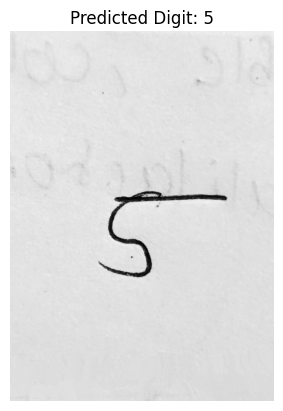

Model Prediction: 5


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#Upload an image
uploaded = files.upload()

for filename in uploaded.keys():
    image_path = filename

#Load and preprocess the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
img = cv2.resize(img, (28, 28))
img = img / 255.0  # Normalize pixel values (0-1)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)

#Use the trained model
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)  # Get the digit with highest probability

#Display the result
plt.imshow(cv2.imread(image_path), cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()

print(f"Model Prediction: {predicted_digit}")
